🔹 1. Nguyên lý hoạt động (không công thức nặng!)
🎯 Mục tiêu:
Dự đoán một giá trị số liên tục (ví dụ: giá nhà, điểm thi, nhiệt độ) dựa trên các đặc trưng đầu vào.

🧠 Ý tưởng chính — “Vẽ một đường thẳng phù hợp nhất!”
Giả sử bạn có dữ liệu: diện tích nhà → giá nhà.
Linear Regression tìm một đường thẳng sao cho:
Tổng khoảng cách (sai số) từ các điểm dữ liệu đến đường thẳng là nhỏ nhất. 
→ Đường thẳng đó có dạng:
Giá dự đoán = hệ số × diện tích + hệ số chặn

💡 Mở rộng cho nhiều đặc trưng:
Không chỉ diện tích, mà còn: số phòng, vị trí, tuổi nhà...
Lúc này, "đường thẳng" trở thành siêu phẳng (hyperplane) trong không gian nhiều chiều.
Nhưng ý tưởng vẫn như nhau: kết hợp tuyến tính các đặc trưng để ra dự đoán.
✅ Ưu điểm:
Cực kỳ đơn giản, nhanh, dễ hiểu.
Giải thích được: hệ số = mức độ ảnh hưởng của đặc trưng.
Làm baseline mạnh cho mọi bài toán hồi quy.
❌ Hạn chế:
Chỉ bắt được mối quan hệ tuyến tính.
Nhạy cảm với ngoại lai (outliers).
Không xử lý được phi tuyến (trừ khi bạn tự tạo đặc trưng như x 
2
  , logx ...).
3. Khi nào dùng Linear Regression?
Mối quan hệ giữa đặc trưng và đầu ra
gần tuyến tính
Dữ liệu có
mối quan hệ phi tuyến mạnh
(hình tròn, sóng...)
Bạn cần
mô hình đơn giản, giải thích được
Cần
độ chính xác cực cao
→ dùng Random Forest Regressor, XGBoost...
Làm
baseline đầu tiên
cho mọi bài toán hồi quy
Dữ liệu có
nhiều ngoại lai (outliers)
→ dùng
RANSAC
hoặc
robust regression
Dữ liệu
ít nhiễu
,
đặc trưng đã được chọn lọc
Số đặc trưng
rất lớn
→ cần
regularization
(Ridge/Lasso)

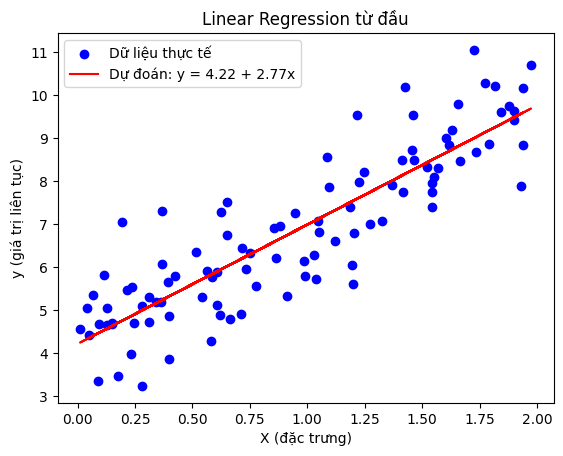

✅ Hệ số R² (tự code): 0.7693
🔍 Sklearn R²: 0.7693


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Khởi tạo trọng số = 0
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            # Dự đoán: y = w1*x1 + w2*x2 + ... + b
            y_pred = np.dot(X, self.weights) + self.bias

            # Tính đạo hàm (gradient) của lỗi (MSE)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Cập nhật trọng số
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# --- Thử nghiệm với dữ liệu 1 chiều (dễ vẽ) ---
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100) * 1  # y = 4 + 3x + noise

# Huấn luyện mô hình tự code
model = SimpleLinearRegression(learning_rate=0.1, n_iters=1000)
model.fit(X, y)

# Dự đoán
y_pred = model.predict(X)

# Vẽ kết quả
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
plt.plot(X, y_pred, color='red', label=f'Dự đoán: y = {model.bias:.2f} + {model.weights[0]:.2f}x')
plt.xlabel('X (đặc trưng)')
plt.ylabel('y (giá trị liên tục)')
plt.legend()
plt.title('Linear Regression từ đầu')
plt.show()

# Tính R² score (độ phù hợp)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)
print(f"✅ Hệ số R² (tự code): {r2:.4f}")

# So sánh với sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sk_model = LinearRegression()
sk_model.fit(X, y)
sk_pred = sk_model.predict(X)
sk_r2 = r2_score(y, sk_pred)
print(f"🔍 Sklearn R²: {sk_r2:.4f}")